### Creating An ANN using Pytorch

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('./datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Data Visualization

In [6]:
df['Outcome'] = np.where(df['Outcome'] == 1 , 'Diabetic' , 'Not Diabetic')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Not Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Not Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


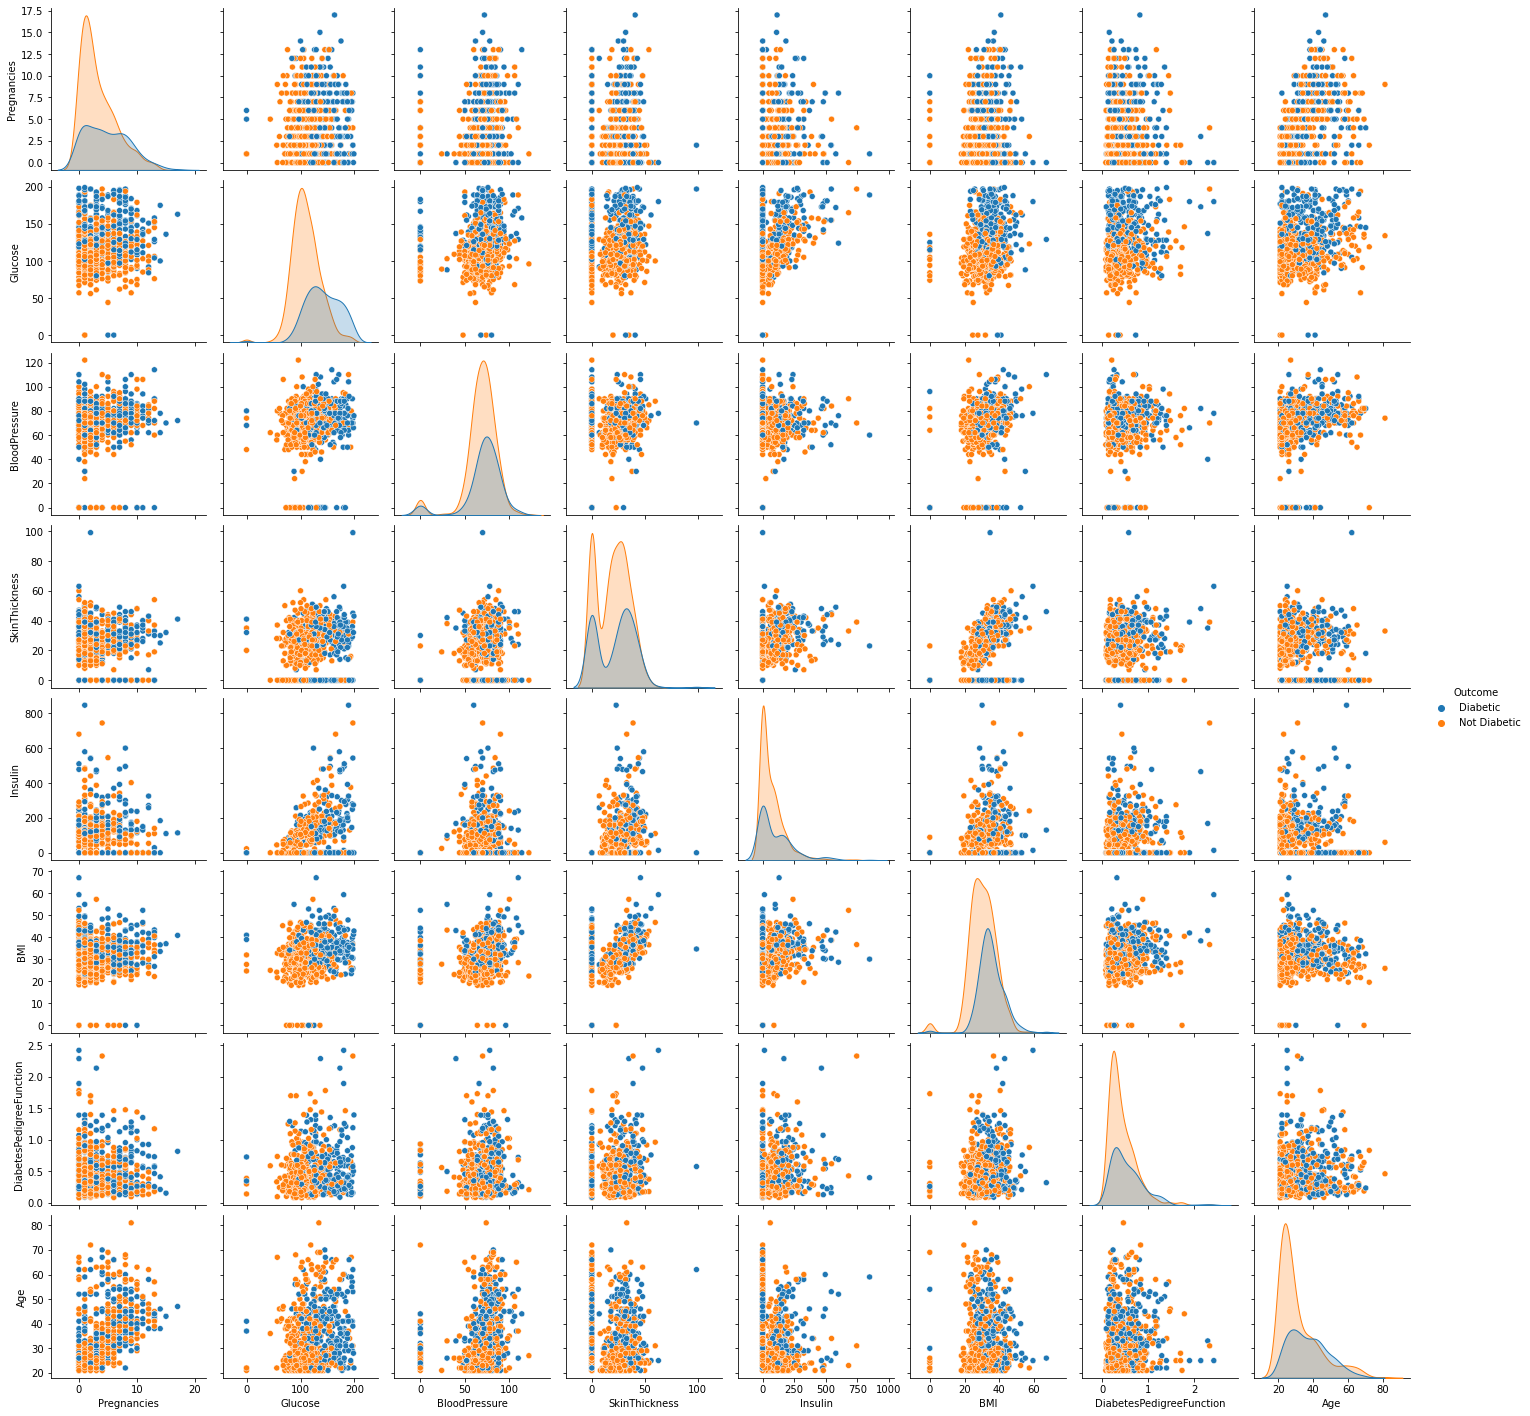

In [8]:
sns.pairplot(df , hue = "Outcome");

In [12]:
df = pd.read_csv('./datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Train test split

In [13]:
X = df.iloc[: , :-1].values   # independent features
y = df['Outcome'].values      # dependent features

print(X.shape , y.shape)

(768, 8) (768,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
y_test.dtype

dtype('int64')

#### Pytorch implementation

In [2]:
# Libraries From Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [21]:
# Creating Tensors - Independent Features have to be in float dtype

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

torch.Size([614, 8]) torch.Size([154, 8]) torch.Size([614]) torch.Size([154])


In [25]:
X_train.dtype , y_train.dtype

(torch.float32, torch.int64)

In [26]:
# Creating Model

class ANN_Model(nn.Module):   # Inherit Module baseclass
    
    def __init__(self, input_features = 8 , hidden1 = 20 , hidden2 = 16 , out_features = 2):  # Initialize model layers
        super().__init__()
        
        self.layer1 = nn.Linear(in_features = input_features , out_features = hidden1)
        self.layer2 = nn.Linear(in_features = hidden1 , out_features = hidden2)
        self.out = nn.Linear(in_features = hidden2 , out_features = out_features)
        
    def forward(self , x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)         # softmax not applied since loss function implicitly performs this on its input
        return x

In [39]:
# Instantiate my ANN_model

torch.manual_seed(42)

model = ANN_Model()
print(model)

ANN_Model(
  (layer1): Linear(in_features=8, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=2, bias=True)
)


In [40]:
for layer in model.parameters():   # learnable parameters
    print(layer)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076],
        [ 0.3117, -0.2594,  0.3073,  0.0662,  0.2612,  0.0479,  0.1705, -0.0499],
        [ 0.2725,  0.0523, -0.1651,  0.0901, -0.1629, -0.0415, -0.1436,  0.2345],
        [-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
        [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
        [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
        [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
        [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218],
        [ 0.1083, -0.0737,  0.2932, -0.2096, -0.2109, -0.2109,  0.3180,  0.1178],
        [ 0.3402, -0.2918, -0.3507, -0.2766, -0.2378,  0.1432,  0.1266,  0.2938],
        [-0.1826, -0.2410,  0.1876, -0.1429,  0.2146, -0.0839,  0.2022, -0.2747],
        [-0.1784,  0.1078,  0.0747, -0.0901,  0.2107,  0.2403, -0.2564, -0.1

In [62]:
# Backward Propogation-- Define the loss_function and the optimizer

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.01)


In [63]:
losses = []

for epoch in range(600):
    preds = model.forward(X_train)
    
    loss = loss_func(preds , y_train)
    losses.append(loss)
    
    optimizer.zero_grad()   # Sets the gradients of all optimized :class:`torch.Tensor` s to zero
    loss.backward()        # calculate gradient wrt parameters
    optimizer.step()      # update the weights
    
    if epoch%40 == 0:
        print('Epoch: {}  ,   Loss: {}'.format(epoch , loss.item()))

Epoch: 0  ,   Loss: 0.3188340663909912
Epoch: 40  ,   Loss: 0.3149705231189728
Epoch: 80  ,   Loss: 0.31248536705970764


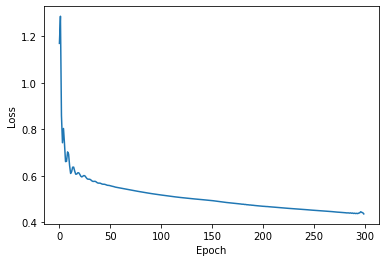

In [47]:
# plot the loss function

import matplotlib.pyplot as plt
plt.plot(range(300) , losses)
plt.ylabel('Loss')
plt.xlabel('Epoch');

In [49]:
model(X_test)[:5]

tensor([[-2.5081, -1.3633],
        [ 0.8205, -0.7675],
        [ 0.7643, -0.9761],
        [ 0.8022, -0.8972],
        [-0.0901,  0.2854]], grad_fn=<SliceBackward>)

In [64]:
with torch.no_grad():  # disable gradient calculation
    preds = model(X_test).argmax(dim = 1)

In [65]:
print('Accuracy: ' , y_test.eq(preds).sum().item()/y_test.shape[0])

Accuracy:  0.7337662337662337


In [67]:
# Prediction In X_test data
predictions=[]

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

In [68]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
cm

array([[80, 19],
       [22, 33]], dtype=int64)

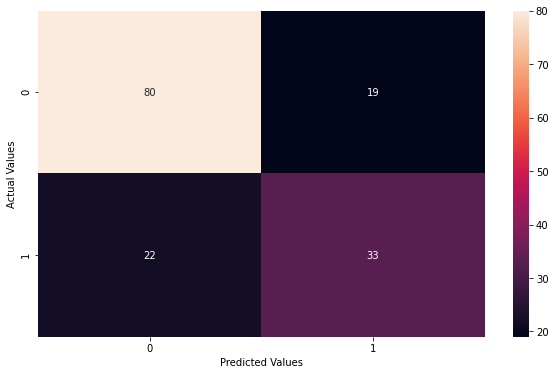

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot = True)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values');

In [74]:
from plotcm import plot_confusion_matrix

Confusion matrix, without normalization
[[80 19]
 [22 33]]


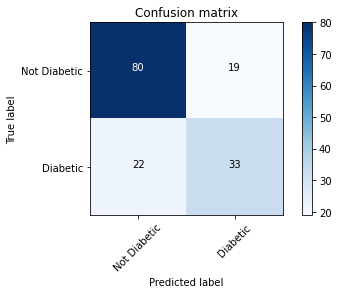

In [76]:
plot_confusion_matrix(cm , classes = ['Not Diabetic' , 'Diabetic'])

In [77]:
# Save the model - Saves an object to a disk file - .pt extension for saving pytorch model
torch.save(model,'diabetes.pt')

In [78]:
# Save And Load the model
model = torch.load('diabetes.pt')

In [81]:
# Sets the module in evaluation mode
model.eval()

ANN_Model(
  (layer1): Linear(in_features=8, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=2, bias=True)
)

In [43]:
# Predcition of new data point
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [44]:
new_data=torch.tensor(lst1)

In [46]:
# Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.1148, 1.4219])
1


## Creating ANN with Pytorch On Pima Diabetes Dataset & Training On GPU

In [1]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [2]:
torch.__version__

'1.8.1+cu102'

In [3]:
torch.version.cuda

'10.2'

In [4]:
torch.cuda.is_available()

True

In [6]:
torch.cuda.current_device()

0

In [7]:
torch.cuda.memory_allocated()

0

In [8]:
torch.cuda.memory_reserved()

0

In [9]:
torch.cuda.device_count()

1

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [14]:
var = torch.FloatTensor([1 , 2 , 3])
var.dtype , var.device

(torch.float32, device(type='cpu'))

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [15]:
var = var.to(device = device)  # or var.cuda()

In [16]:
var.device

device(type='cuda', index=0)

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('./datasets/diabetes.csv')
df.shape

(768, 9)

In [19]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [20]:
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

x.shape , y.shape

((768, 8), (768,))

In [21]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=2 , stratify=y , test_size=0.2)

In [22]:
x_train = torch.FloatTensor(x_train).cuda()   # float32
x_test = torch.FloatTensor(x_test).cuda()

y_train = torch.LongTensor(y_train).cuda()   # int64
y_test = torch.LongTensor(y_test).cuda()


print(x_train.shape , x_train.device , x_train.dtype)
print(y_train.shape , y_train.device , y_train.dtype)

torch.Size([614, 8]) cuda:0 torch.float32
torch.Size([614]) cuda:0 torch.int64


In [ ]:
class ANNModel(nn.Module):
    def __init__(self , input_features=x_train.shape[1], hidden1=20, hidden2=10, output_features=2):
        super().__init__()
        
        self.fc1 = nn.Linear(input_features , hidden1)
        self.fc2 = nn.Linear(hidden1 , hidden2)
        self.out = nn.Linear(hidden2 , output_features)
        
    def forward(self , t):
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        return self.out(t) 

In [24]:
torch.manual_seed(20)
model = ANNModel()

In [25]:
model.parameters  # layers

<bound method Module.parameters of ANNModel(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)>

In [26]:
# check whether model layers are assigned to gpu
for p in model.parameters():
    print(p.is_cuda)

False
False
False
False
False
False


In [27]:
model = model.to(device = device)   # model weights are allocated to gpu

In [28]:
for p in model.parameters():
    print(p.is_cuda , p.device)

True cuda:0
True cuda:0
True cuda:0
True cuda:0
True cuda:0
True cuda:0


In [29]:
# Returns the current GPU memory occupied by tensors in bytes for a given device
torch.cuda.memory_allocated()

36352

In [30]:
torch.cuda.memory_reserved()

2097152

In [45]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 1e-2)

In [46]:
import time
import matplotlib.pyplot as plt

In [47]:
y_train.shape

torch.Size([614])

In [58]:
start = time.time()

losses = []

for i in range(500):
    y_pred = model.forward(x_train)
    loss = loss_func(y_pred , y_train)
    losses.append(loss.item())
    
    if i%100==0:
        print(f'Epoch {i} : ', loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
end = time.time()
print("Time taken: " , end-start)   

Epoch 0 :  7.371241569519043
Epoch 100 :  0.5672558546066284
Epoch 200 :  0.5229320526123047
Epoch 300 :  0.46738290786743164
Epoch 400 :  0.42556890845298767
Time taken:  2.109431743621826


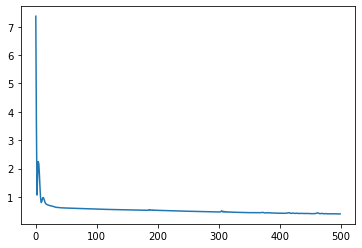

In [60]:
plt.plot(np.arange(0, 500, 1) , losses);

In [70]:
predictions = []

with torch.no_grad():
    
    for i in range(x_test.shape[0]):
        pred = model(x_test[i])
        predictions.append(pred.argmax().item())

In [80]:
acc = (torch.LongTensor(predictions).cuda().eq(y_test).sum()/x_test.shape[0])*100
acc.to(device = 'cpu').item()

70.77922058105469

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.to(device = 'cpu').numpy() , predictions)
cm

array([[85, 15],
       [30, 24]], dtype=int64)

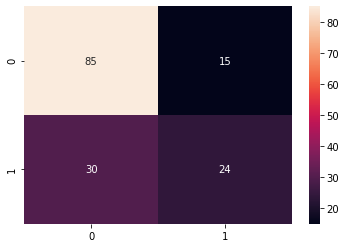

In [87]:
import seaborn as sns
sns.heatmap(cm , annot=True);

In [90]:
torch.save(model , 'diabetes.pt')